In [9]:
import pandas as pd
import matplotlib.pyplot as plt


data = {}

def importData(filename):

    f = open(filename, "r")
    temperature = float(f.readline().strip("Temperature "))
    df = pd.read_csv(filename, skiprows=1)
    return temperature, df

for i in range(10):
    temperature, df = importData("output/temp_%s" % i)
    data[temperature] = df


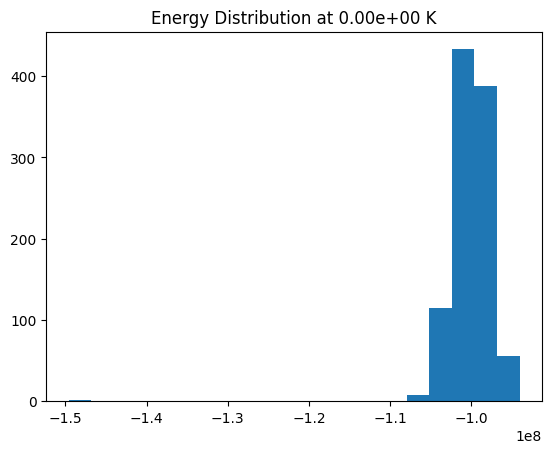

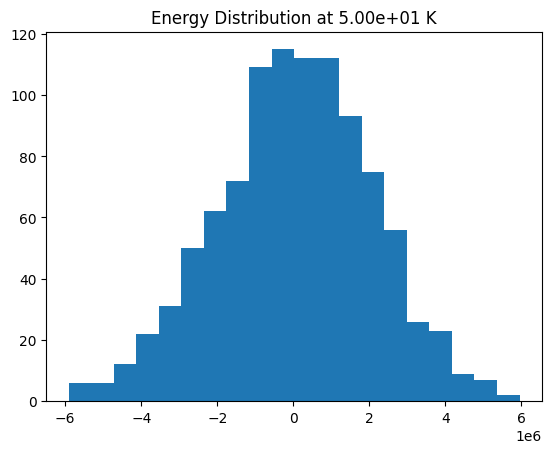

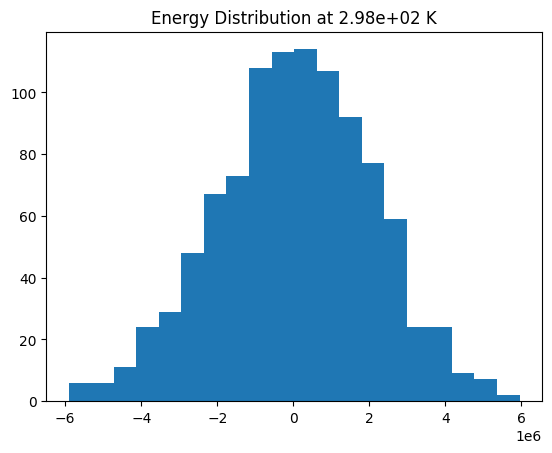

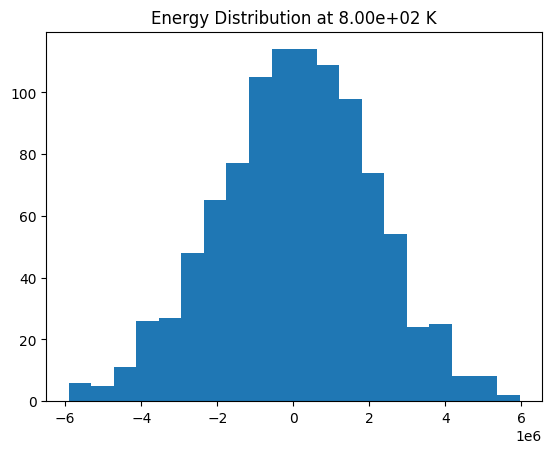

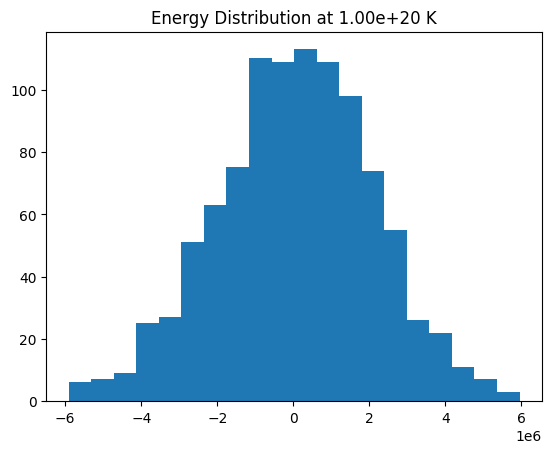

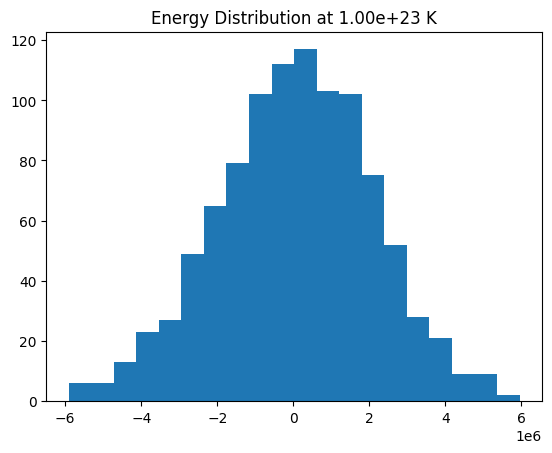

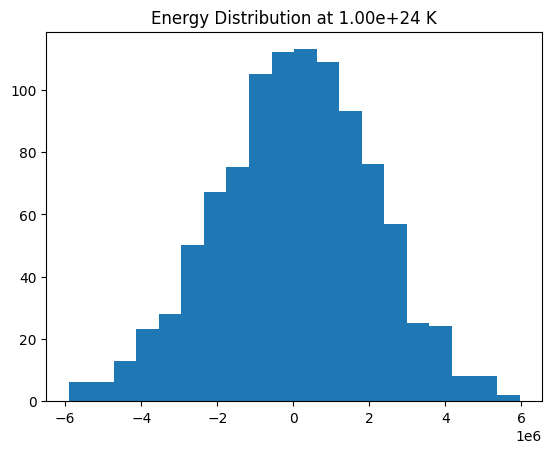

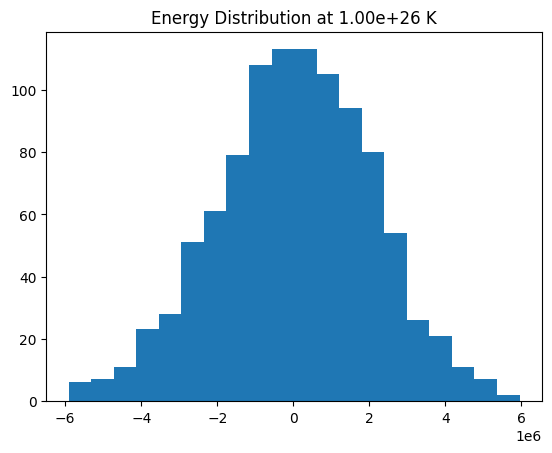

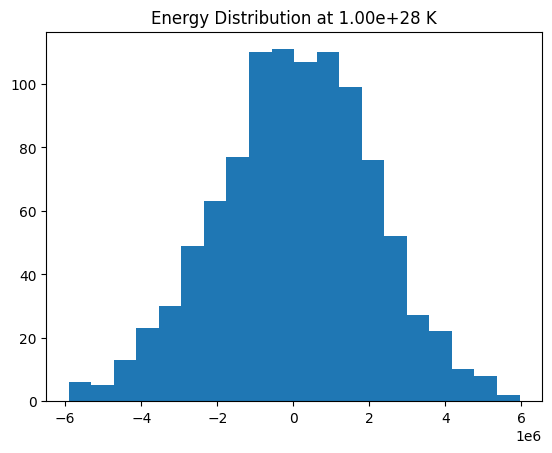

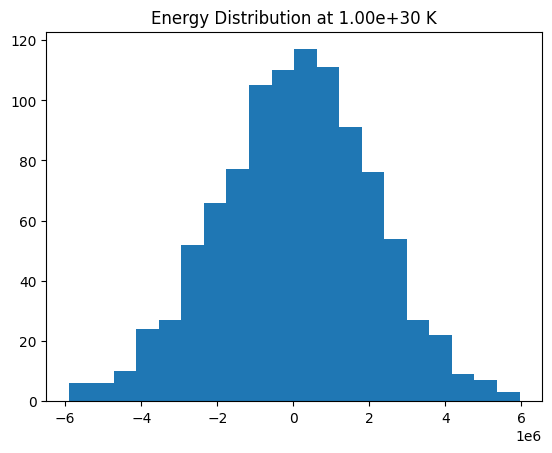

In [10]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["energy"], bins=20)
    ax.set_title(f"Energy Distribution at %s K" % "{:.2e}".format(temperature))


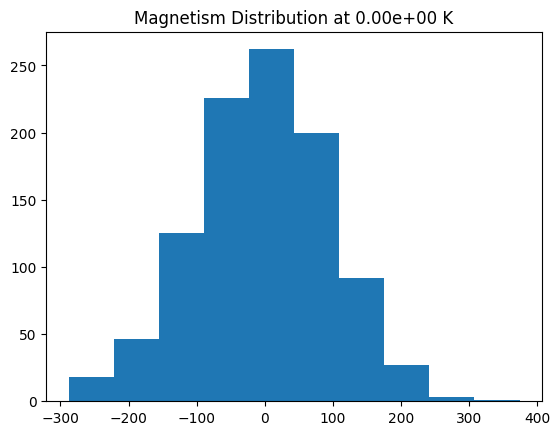

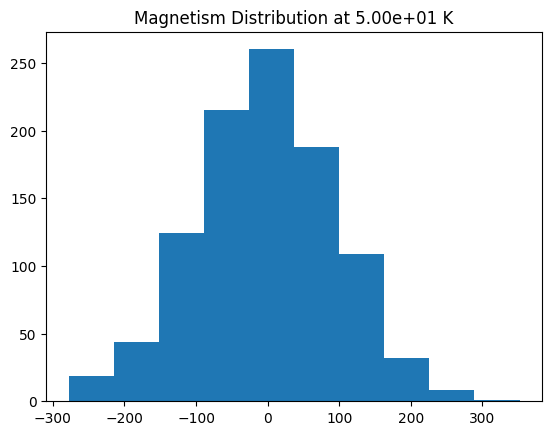

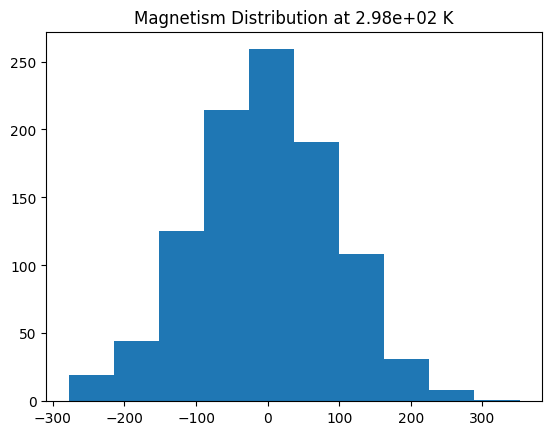

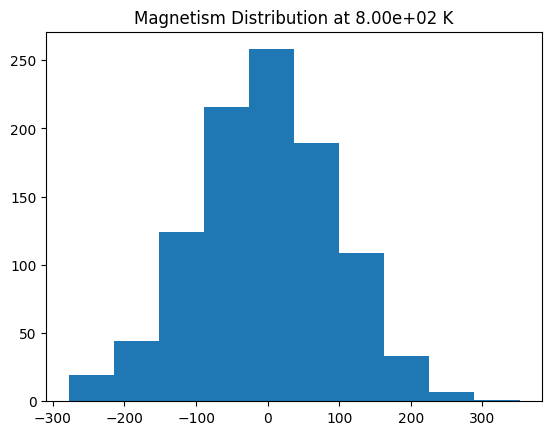

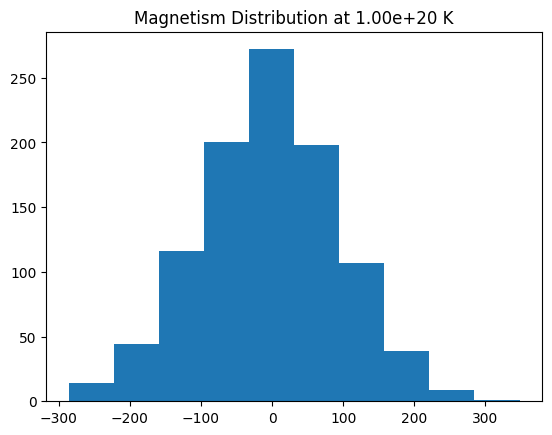

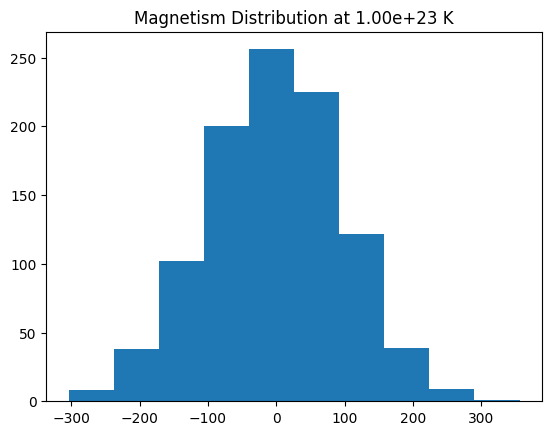

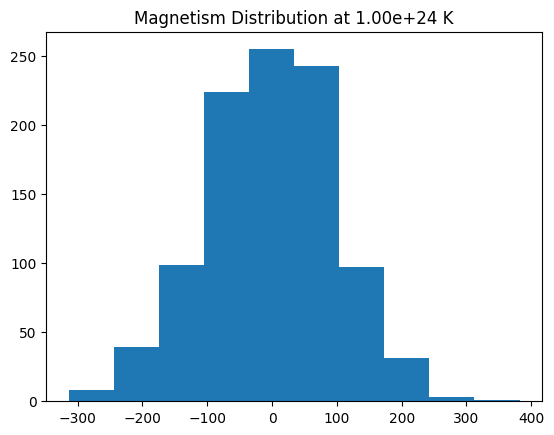

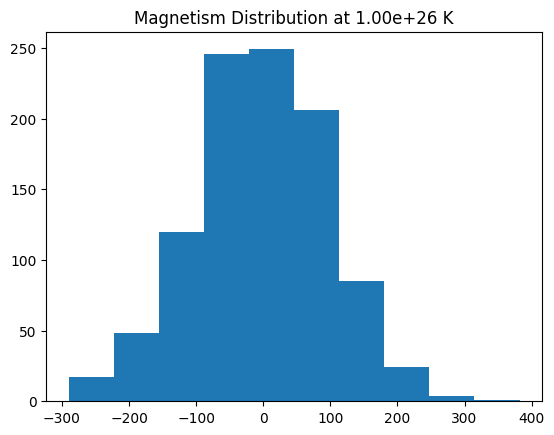

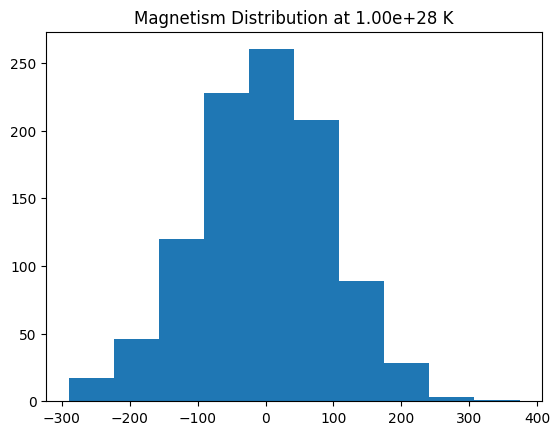

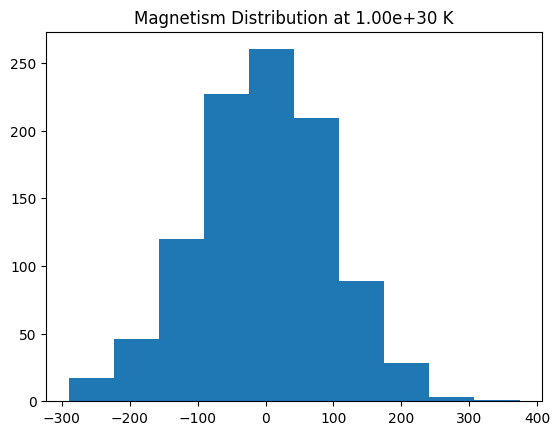

In [4]:
for temperature in data.keys():

    fig, ax = plt.subplots()
    df = data[temperature]
    ax.hist(df["magnetism"])
    ax.set_title(f"Magnetism Distribution at %s K" % "{:.2e}".format(temperature))

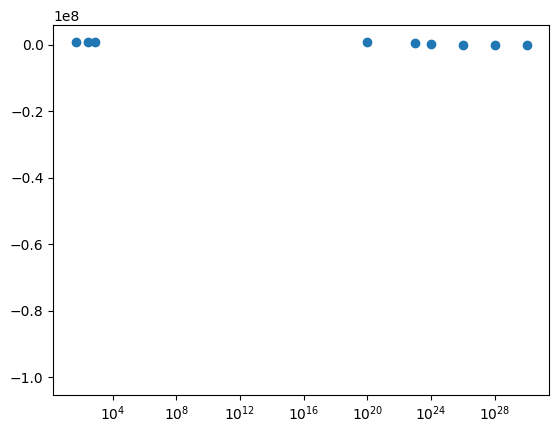

In [8]:
fig, ax = plt.subplots()

mean_energies = []

for temp in data.keys():
    mean_energies.append(data[temp]["energy"].mean())

ax.scatter(data.keys(), mean_energies)
ax.set_xscale("log")
# ax.set_ylim(0.1)
# ax.set_ylim(0, -